# 2872. Maximum Number of K-Divisible Components

There is an undirected tree with n nodes labeled from 0 to n - 1. You are given the integer n and a 2D integer array edges of length n - 1, where edges[i] = [ai, bi] indicates that there is an edge between nodes ai and bi in the tree.

You are also given a 0-indexed integer array values of length n, where values[i] is the value associated with the ith node, and an integer k.

A valid split of the tree is obtained by removing any set of edges, possibly empty, from the tree such that the resulting components all have values that are divisible by k, where the value of a connected component is the sum of the values of its nodes.

Return the maximum number of components in any valid split.

 

Example 1:

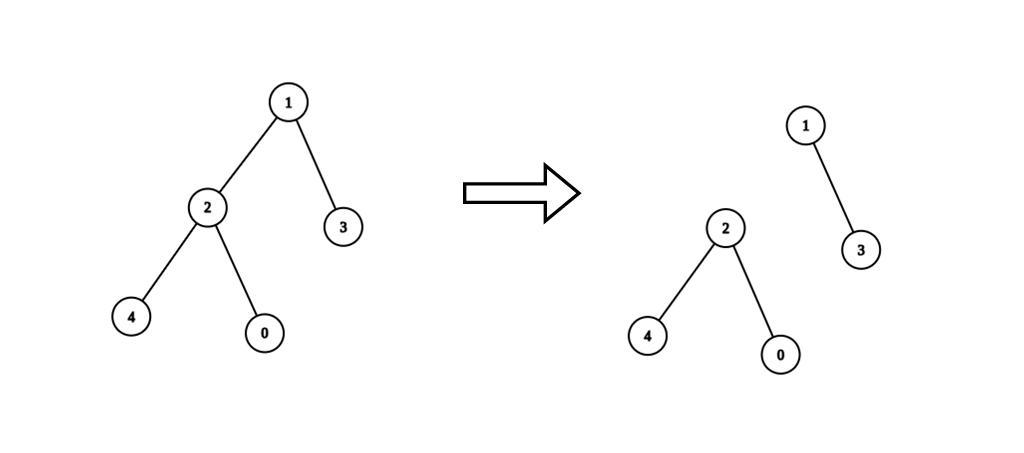


Input: n = 5, edges = [[0,2],[1,2],[1,3],[2,4]], values = [1,8,1,4,4], k = 6
Output: 2
Explanation: We remove the edge connecting node 1 with 2. The resulting split is valid because:
- The value of the component containing nodes 1 and 3 is values[1] + values[3] = 12.
- The value of the component containing nodes 0, 2, and 4 is values[0] + values[2] + values[4] = 6.
It can be shown that no other valid split has more than 2 connected components.
Example 2:

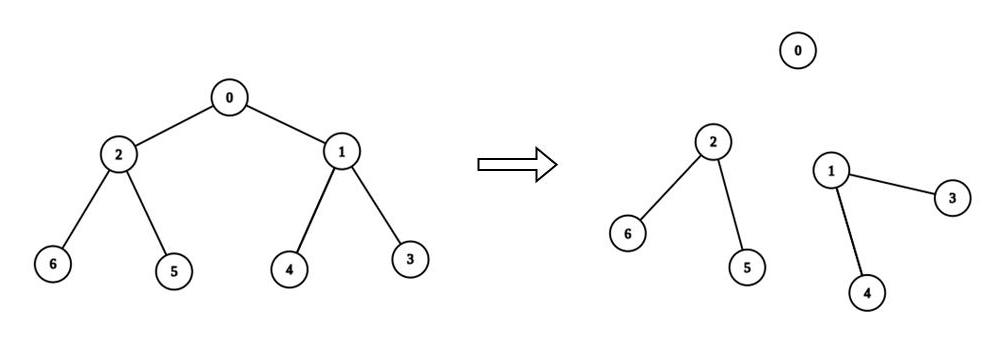


Input: n = 7, edges = [[0,1],[0,2],[1,3],[1,4],[2,5],[2,6]], values = [3,0,6,1,5,2,1], k = 3
Output: 3
Explanation: We remove the edge connecting node 0 with 2, and the edge connecting node 0 with 1. The resulting split is valid because:
- The value of the component containing node 0 is values[0] = 3.
- The value of the component containing nodes 2, 5, and 6 is values[2] + values[5] + values[6] = 9.
- The value of the component containing nodes 1, 3, and 4 is values[1] + values[3] + values[4] = 6.
It can be shown that no other valid split has more than 3 connected components.
 

Constraints:

1 <= n <= 3 * 104
edges.length == n - 1
edges[i].length == 2
0 <= ai, bi < n
values.length == n
0 <= values[i] <= 109
1 <= k <= 109
Sum of values is divisible by k.
The input is generated such that edges represents a valid tree.

Hints: 
1. Root the tree at node 0.
2. If a leaf node is not divisible by k, it must be in the same component as its parent node so we merge it with its parent node.
3. If a leaf node is divisible by k, it will be in its own components so we separate it from its parent node.
4. In each step, we either cut a leaf node down or merge a leaf node. The number of nodes on the tree reduces by one. Repeat this process until only one node is left.

They aren't asking for giving the splits, they just want us to count it, and we are counting differently although the end result is the same

## Solution: DFS

In [2]:
from collections import defaultdict

In [10]:
n = 7; edges = [[0,1],[0,2],[1,3],[1,4],[2,5],[2,6]]; values = [3,0,6,1,5,2,1];k = 3
res=0
#Create adjacency list
adj=defaultdict(list)
for v1,v2 in edges:
    adj[v1].append(v2)
    adj[v2].append(v1)
def DFS(cur,parent):
    sum_=values[cur]
    #Iterate through the child nodes, the loop won't execute if we reach a leaf node
    for child in adj[cur]:
        if child!=parent: #To avoid cycles
            sum_+=DFS(child,cur)
    #Check sum divisibility
    global res
    if sum_%k==0:
        res+=1
    return sum_

DFS(0,-1)
res

3

In [11]:
adj

defaultdict(list,
            {0: [1, 2],
             1: [0, 3, 4],
             2: [0, 5, 6],
             3: [1],
             4: [1],
             5: [2],
             6: [2]})